PAC. Pràctica 2. Tipologia i cicle de vida de les dades. Universitat Oberta de Catalunya. 

J. de Curtò i DíAz & I. de Zarzà i Cubero. decurto@uoc.edu dezarza@uoc.edu

K-means Clustering and PCA(2) with images from Curiosity.

Adapt folder paths accordingly. Data is available at:

CyZ: MARS Space Exploration Dataset.

https://github.com/decurtoidiaz/cyz

DrCyZ: Techniques for analyzing and extracting useful information from CyZ.

https://github.com/decurtoidiaz/drcyz

c@decurto.be z@dezarza.be

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import matplotlib.pyplot as plt
import cv2
import os
import random
import numpy as np
from PIL import Image
from sklearn.feature_extraction import image
from skimage import io
from sklearn.cluster import MiniBatchKMeans

!unzip '/content/drive/MyDrive/Colab Notebooks/cyz_1.1.zip'

data = []
folder = '/content/cyz_1.1/curiosity_cyz/png/'

for filename in os.listdir(folder):
    image = cv2.imread(os.path.join(folder,filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (64,64))
        image = image.flatten()
        data.append([image, folder + filename])

Streaming output truncated to the last 5000 lines.
  inflating: cyz_1.1/curiosity_cyz/png/FLB_686893917EDR_S0910516FHAZ00595M_-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/3286MR1009510051500692C00_DXXX-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/3249ML1008390020507445C00_DXXX-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/NRB_673855193EDR_D0872932TRAV00952M_-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/NRB_684051967EDR_F0910390NCAM00200M_-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/3251ML1008440320507668C00_DXXX-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/CR0_675978078EDR_F0880804CCAM03137M_-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/NLB_674473617EDR_D0880246TRAV00954M_-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/3219ML1006880190806693C00_DXXX-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/3085ML0161210001200986C00_DXXX-thm.png  
  inflating: cyz_1.1/curiosity_cyz/png/NRB_682734524EDR_F0902630NCAM00551M_-thm.png  
  inflating: cyz_1.1/curiosity_cy

In [5]:
print(len(data))
features, images  = zip(*data)

41425


In [6]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(features)

n_cams = 8
kmeans = MiniBatchKMeans(n_clusters=n_cams)

#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)

In [7]:
tx, ty = df[:,0], df[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

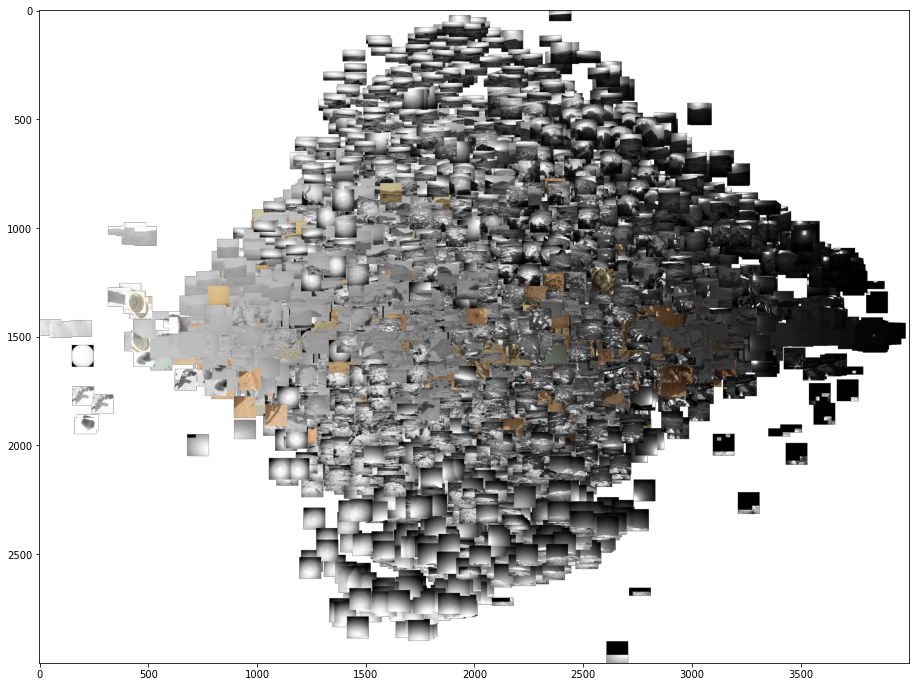

In [8]:
import matplotlib.pyplot
from matplotlib.pyplot import imshow

width = 4000
height = 3000
max_dim = 100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(images, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [9]:
import os
import json

full_image.save("/content/drive/MyDrive/Colab Notebooks/test_clustering_curiosity_cyz+.png")

path_clustering = "/content/drive/MyDrive/Colab Notebooks/test_clustering_curiosity_cyz+.json"

data = [{"path":os.path.abspath(img), "point":[float(x), float(y)]} for img, x, y in zip(images, tx, ty)]
with open(path_clustering, 'w') as outfile:
    json.dump(data, outfile)

print("saved K-means Clustering to %s" % path_clustering)

saved K-means Clustering to /content/drive/MyDrive/Colab Notebooks/test_clustering_curiosity_cyz+.json


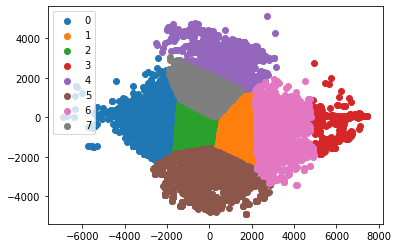

In [10]:
#plotting the results:
for c in u_labels:
    plt.scatter(df[label == c , 0] , df[label == c , 1] , label = c)
plt.legend()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/clustering_curiosity_cyz+.png', dpi=300, bbox_inches='tight')
plt.show()